In [ ]:
#How does financial literacy vary across age groups and genders in the 2024 NFCS data?
#How does financial literacy vary across regions and divisions in the 2024 NFCS data?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1) Load original dataset ===
original_df = pd.read_csv("NFCS 2024 State Data 250623.csv")



# === 2) Dictionary Mapping ===

# STATEQ (2) State
stateq = {
    1: "Alabama", 2: "Alaska", 3: "Arizona", 4: "Arkansas", 5: "California",
    6: "Colorado", 7: "Connecticut", 8: "Delaware", 9: "District of Columbia",
    10: "Florida", 11: "Georgia", 12: "Hawaii", 13: "Idaho", 14: "Illinois",
    15: "Indiana", 16: "Iowa", 17: "Kansas", 18: "Kentucky", 19: "Louisiana",
    20: "Maine", 21: "Maryland", 22: "Massachusetts", 23: "Michigan",
    24: "Minnesota", 25: "Mississippi", 26: "Missouri", 27: "Montana",
    28: "Nebraska", 29: "Nevada", 30: "New Hampshire", 31: "New Jersey",
    32: "New Mexico", 33: "New York", 34: "North Carolina", 35: "North Dakota",
    36: "Ohio", 37: "Oklahoma", 38: "Oregon", 39: "Pennsylvania", 40: "Rhode Island",
    41: "South Carolina", 42: "South Dakota", 43: "Tennessee", 44: "Texas",
    45: "Utah", 46: "Vermont", 47: "Virginia", 48: "Washington", 49: "West Virginia",
    50: "Wisconsin", 51: "Wyoming"
}

# CENSUSDIV (3) Census Division
census_div = {
    1: "New England",
    2: "Middle Atlantic",
    3: "East North Central",
    4: "West North Central",
    5: "South Atlantic",
    6: "East South Central",
    7: "West South Central",
    8: "Mountain",
    9: "Pacific"
}

# CENSUSREG (4) Census Region
census_reg = {
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West"
}

# A50A (5) Gender (nonbinary randomly assigned)
gender = {
    1: "Male",
    2: "Female"
}

# A3Ar_w (6) Age group
age_group = {
    1: "18-24",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65+"
}

# A50B (7) Gender/Age net (nonbinary randomly assigned)
gender_age = {
    1: "Male 18-24",
    2: "Male 25-34",
    3: "Male 35-44",
    4: "Male 45-54",
    5: "Male 55-64",
    6: "Male 65+",
    7: "Female 18-24",
    8: "Female 25-34",
    9: "Female 35-44",
    10: "Female 45-54",
    11: "Female 55-64",
    12: "Female 65+"
}

# A4A_new_w (8) Ethnicity
ethnicity = {
    1: "White non-Hispanic",
    2: "Non-White"
}

# A5_2015 (9) Highest education completed
education_2015 = {
    1: "Did not complete high school",
    2: "High school graduate - regular high school diploma",
    3: "High school graduate - GED or alternative credential",
    4: "Some college, no degree",
    5: "Associate's degree",
    6: "Bachelor's degree",
    7: "Post graduate degree",
    99: "Prefer not to say"
}

# A6 (10) Marital status
marital_status = {
    1: "Married",
    2: "Single",
    3: "Separated",
    4: "Divorced",
    5: "Widowed/widower",
    99: "Prefer not to say"
}

# A7 (11) Current living arrangements
living_arrangements = {
    1: "I am the only adult in the household",
    2: "I live with my spouse/partner/significant other",
    3: "I live in my parents' home",
    4: "I live with other family, friends, or roommates",
    99: "Prefer not to say"
}

# A7A (12) Marital status variable
marital_status_var = {
    1: "Married",
    2: "Living with partner",
    3: "Single"
}

# A11 (13) Number of financially dependent children
num_children = {
    1: "1",
    2: "2",
    3: "3",
    4: "4 or more",
    5: "No financially dependent children",
    6: "Do not have any children",
    99: "Prefer not to say"
}

# A8_2021 (14) Household approximate annual income
annual_income = {
    1: "Less than $15,000",
    2: "At least $15,000 but less than $25,000",
    3: "At least $25,000 but less than $35,000",
    4: "At least $35,000 but less than $50,000",
    5: "At least $50,000 but less than $75,000",
    6: "At least $75,000 but less than $100,000",
    7: "At least $100,000 but less than $150,000",
    8: "At least $150,000 but less than $200,000",
    9: "At least $200,000 but less than $300,000",
    10: "$300,000 or more",
    98: "Don't know",
    99: "Prefer not to say"
}

# AM21 (15) Have you ever been a member of the U.S. Armed Services
armed_services = {
    1: "Currently a member of the U.S. Armed Services",
    2: "Previously a member of the U.S. Armed Services",
    3: "Never a member of the U.S. Armed Services",
    99: "Prefer not to say"
}

# X3 (16) Questionnaire version
questionnaire_version = {
    1: "Core questions",
    2: "Military"
}

# A9 (17) Current employment or work status
employment_status = {
    1: "Self-employed",
    2: "Work full-time for an employer [or the military]",
    3: "Work part-time for an employer [or the military]",
    4: "Homemaker",
    5: "Full-time student",
    6: "Permanently sick, disabled, or unable to work",
    7: "Unemployed or temporarily laid off",
    8: "Retired",
    99: "Prefer not to say"
}

# A40 (18) Additional work for pay in past 12 months
additional_work = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# A10 (19) Spouse/partner employment status
spouse_employment = {
    1: "Self-employed",
    2: "Work full-time for an employer",
    3: "Work part-time for an employer",
    4: "Homemaker",
    5: "Full-time student",
    6: "Permanently sick, disabled, or unable to work",
    7: "Unemployed or temporarily laid off",
    8: "Retired",
    99: "Prefer not to say"
}

# A10A (20) Household retirement status
household_retirement = {
    1: "Non-retired household",
    2: "Retired household--Respondent retired",
    3: "Retired household--Respondent not working and spouse retired"
}

# A21_2015 (21) Part-time student
part_time_student = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# A14 (22) Knowledgeable about saving/investing/debt
household_finance_knowledge = {
    1: "You",
    2: "Someone else",
    3: "You and someone else are equally knowledgeable",
    98: "Don't know",
    99: "Prefer not to say"
}

# A41 (23) Highest education completed
education_level = {
    1: "Did not complete high school",
    2: "High school graduate/GED",
    3: "Some college, no degree",
    4: "Associate's degree",
    5: "Bachelor's degree",
    6: "Post graduate degree",
    98: "Don't know",
    99: "Prefer not to say"
}

# A61 (24) Parents or older relatives financially dependent
financial_dependents = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J1 (25) Satisfaction with financial condition
financial_satisfaction = {
    1: "1 - Not At All Satisfied",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10 - Extremely Satisfied",
    98: "Don't know",
    99: "Prefer not to say"
}

# J2 (26) Willingness to take financial risks
financial_risk_willingness = {
    1: "1 - Not At All Willing",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10 - Very Willing",
    98: "Don't know",
    99: "Prefer not to say"
}

# J3 (27) Spending vs income
spending_vs_income = {
    1: "Spending less than income",
    2: "Spending more than income",
    3: "Spending about equal to income",
    98: "Don't know",
    99: "Prefer not to say"
}

# J4 (28) Difficulty covering expenses
expense_difficulty = {
    1: "Very difficult",
    2: "Somewhat difficult",
    3: "Not at all difficult",
    98: "Don't know",
    99: "Prefer not to say"
}

# J40 (29) Household income description
income_variability = {
    1: "Roughly the same amount each month",
    2: "Occasionally varies from month to month",
    3: "Varies quite often from month to month",
    98: "Don't know",
    99: "Prefer not to say"
}

# J5 (30) Emergency or rainy day funds
emergency_funds = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J6 (31) Saving for children's college education
college_savings = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J8 (32) Tried to figure out how much to save for retirement
retirement_planning = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J9 (33) Tried to figure out retirement savings before spouse retired
pre_retirement_planning = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J10 (34) Experienced a large unexpected drop in income in past 12 months
income_drop = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J20 (35) Confidence in coming up with $2,000 in an unexpected need
confidence_2000 = {
    1: "I am certain I could come up with the full $2,000",
    2: "I could probably come up with $2,000",
    3: "I could probably not come up with $2,000",
    4: "I am certain I could not come up with $2,000",
    98: "Don't know",
    99: "Prefer not to say"
}

# J60_1 (36) Source of $2,000 - money already saved
source_saved_money = {
    0: "NOT SELECTED: Take it from money I have saved",
    1: "Take it from money I have saved"
}

# J60_2 (37) Source of $2,000 - credit card
source_credit_card = {
    0: "NOT SELECTED: Put it on a credit card",
    1: "Put it on a credit card"
}

# J60_3 (38) Source of $2,000 - borrow from family/friends
source_borrow = {
    0: "NOT SELECTED: Borrow from family/friends",
    1: "Borrow from family/friends"
}

# J60_4 (39) Source of $2,000 - take out a loan
source_loan = {
    0: "NOT SELECTED: Take out a loan",
    1: "Take out a loan"
}

# J60_5 (40) Source of $2,000 - withdraw from retirement account
source_retirement = {
    0: "NOT SELECTED: Withdraw from a retirement account",
    1: "Withdraw from a retirement account"
}

# J60_6 (41) Source of $2,000 - work more to get more income
source_work_more = {
    0: "NOT SELECTED: Work more to get more income",
    1: "Work more to get more income"
}

# J60_7 (42) Source of $2,000 - sell something owned
source_sell_assets = {
    0: "NOT SELECTED: Sell something I own (e.g., jewelry, car, etc.)",
    1: "Sell something I own (e.g., jewelry, car, etc.)"
}

# J60_90 (43) Source of $2,000 - other
source_other = {
    0: "NOT SELECTED: Other",
    1: "Other"
}

# J60_98 (44) Source of $2,000 - don't know
source_dont_know = {
    0: "NOT SELECTED: Don't know",
    1: "Don't know"
}

# J60_99 (45) Source of $2,000 - prefer not to say
source_prefer_no = {
    0: "NOT SELECTED: Prefer not to say",
    1: "Prefer not to say"
}

# J61 (46) Increased food costs caused cutting back on other spending
food_costs_cutbacks = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J62 (47) Experienced severe weather events affecting finances
severe_weather_finances = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J32 (48) Rating of current credit record
credit_record_rating = {
    1: "Very bad",
    2: "Bad",
    3: "About average",
    4: "Good",
    5: "Very good",
    98: "Don't know",
    99: "Prefer not to say"
}

# J33_40 (49) Thinking about personal finances can make me feel anxious
finance_anxiety = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# J63 (50) Time spent thinking about personal finances
time_finances_total = {
    1: "0 hours per week",
    2: "1 hour",
    3: "2 hours",
    4: "3 to 4 hours",
    5: "5 to 9 hours",
    6: "10 to 19 hours",
    7: "20+ hours per week",
    98: "Don't know",
    99: "Prefer not to say"
}

# J64 (51) Hours spent at work thinking about finances
time_finances_work = {
    1: "0 hours per week",
    2: "1 hour",
    3: "2 hours",
    4: "3 to 4 hours",
    5: "5 to 9 hours",
    6: "10 to 19 hours",
    7: "20+ hours per week",
    98: "Don't know",
    99: "Prefer not to say"
}

# J41_1 (52) Feeling like never having the things I want
money_never_have = {
    1: "Does not describe me at all",
    2: "Describes me very little",
    3: "Describes me somewhat",
    4: "Describes me very well",
    5: "Describes me completely",
    98: "Don't know",
    99: "Prefer not to say"
}

# J41_2 (53) Just getting by financially
money_just_getting_by = money_never_have.copy()  # same scale

# J41_3 (54) Concern money won't last
money_wont_last = money_never_have.copy()  # same scale

# J42_1 (55) Money left over at end of month
money_leftover = {
    1: "Never",
    2: "Rarely",
    3: "Sometimes",
    4: "Often",
    5: "Always",
    98: "Don't know",
    99: "Prefer not to say"
}

# J42_2 (56) Finances control my life
finances_control_life = money_leftover.copy()  # same scale

# J43 (57) Confidence in achieving financial goal
financial_goal_confidence = {
    1: "Not at all confident",
    2: "Not very confident",
    3: "Somewhat confident",
    4: "Very confident",
    98: "Don't know",
    99: "Prefer not to say"
}

# J65 (58) Targeted in financial fraud or scam
targeted_fraud = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# J66 (59) Lost money due to fraud or scam
lost_money_fraud = targeted_fraud.copy()  # same scale

# B1 (60) Checking account
checking_account = targeted_fraud.copy()  # same scale

# B2 (61) Savings account, money market, or CDs
savings_account = targeted_fraud.copy()  # same scale

# B4 (62) Overdraw checking account occasionally
overdraw_checking = targeted_fraud.copy()  # same scale

# B41_1 (63) Online banking usage
online_banking = {
    1: "Never",
    2: "Sometimes",
    3: "Frequently",
    98: "Don't know",
    99: "Prefer not to say"
}

# B41_2 (64) Mobile banking usage
mobile_banking = online_banking.copy()  # same scale

# B60 (65) Trust banks will treat me fairly
trust_banks = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# B31 (66) Mobile device payment frequency
mobile_payment = {
    1: "Frequently",
    2: "Sometimes",
    3: "Never",
    98: "Don't know",
    99: "Prefer not to say"
}

# B42 (67) Mobile money transfer frequency
mobile_transfer = mobile_payment.copy()  # same scale

# B43 (68) Use websites/apps for financial tasks
finance_apps = mobile_payment.copy()  # same scale

# B61 (69) Interest in AI financial advice
ai_financial_advice = targeted_fraud.copy()  # same scale

# C1_2012 (70) Retirement plans through employer
retirement_plan = targeted_fraud.copy()  # same scale

# C2_2012 (71) Retirement plans provided by
retirement_plan_provider = {
    1: "Your employer",
    2: "Your [spouse's/partner's] employer",
    3: "Both your employer and your [spouse's/partner's] employer",
    98: "Don't know",
    99: "Prefer not to say"
}

# C3_2012 (72) Choose how retirement money is invested
retirement_plan_investment_choice = targeted_fraud.copy()  # same scale

# C4_2012 (73) Other retirement accounts not through employer
other_retirement_accounts = targeted_fraud.copy()  # same scale

# C5_2012 (74) Regularly contribute to retirement account
contribute_retirement = targeted_fraud.copy()  # same scale

# C10_2012 (75) Loan from retirement account in last 12 months
retirement_loan = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# C11_2012 (76) Hardship withdrawal from retirement account in last 12 months
hardship_withdrawal = retirement_loan.copy()  # same scale

# B14A_1 (77) Investments in stocks, bonds, mutual funds, or other securities
investments_securities = retirement_loan.copy()  # same scale

# B14A_60 (78) Investments in crypto
investments_crypto = retirement_loan.copy()  # same scale

# EA_1 (79) Own home
home_ownership = retirement_loan.copy()  # same scale

# E7 (80) Have mortgage
mortgage = retirement_loan.copy()  # same scale

# E8 (81) Home equity loans
home_equity_loan = retirement_loan.copy()  # same scale

# E20 (82) Owe more on home than could sell for
home_owe_more = {
    1: "Yes, owe more",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# E15_2015 (83) Late with mortgage payments past 12 months
mortgage_late_payments = {
    1: "Never",
    2: "Once",
    3: "More than once",
    98: "Don't know",
    99: "Prefer not to say"
}

# E60 (84) Increased housing costs caused cutbacks in past 5 years
housing_cost_cutbacks = retirement_loan.copy()  # same scale

# P60 (85) Parents/grandparents paid for major expense
family_major_expense = retirement_loan.copy()  # same scale

# P51 (86) Received gift worth $10,000+
large_gift = retirement_loan.copy()  # same scale

# P61 (87) Received inheritance worth $10,000+
inheritance = {
    1: "Yes",
    2: "No, but I expect to in the future",
    3: "No, and I do not expect to",
    98: "Don't know",
    99: "Prefer not to say"
}

# F1 (88) Number of credit cards
num_credit_cards = {
    1: "1",
    2: "2 to 3",
    3: "4 to 8",
    4: "9 to 12",
    5: "13 to 20",
    6: "More than 20",
    7: "No credit cards",
    98: "Don't know",
    99: "Prefer not to say"
}

# F2_1 to F2_6 (89-94) Credit card experience in past 12 months
credit_card_experience = retirement_loan.copy()  # all Yes/No scale

# G1 (95) Auto loan
auto_loan = retirement_loan.copy()  # same scale

# G20 (96) Unpaid health care bills past due
unpaid_health_bills = retirement_loan.copy()  # same scale

# G30_1 to G30_5 (97-101) Student loans for self, spouse, child, grandchild, other
student_loans = {
    0: "NOT SELECTED",
    1: "Selected"
}

# G30_97 to G30_99 (102-104) Student loans - No/Don't know/Prefer not to say
student_loans_special = student_loans.copy()  # same scale

# G35 (105) Late student loan payment past 12 months
student_loan_late = {
    1: "Never, payments are not due on my loans at this time",
    2: "Never, I have been repaying on time each month",
    3: "Once",
    4: "More than once",
    98: "Don't know",
    99: "Prefer not to say"
}

# G22_2015 (106) Concern about paying student loans
student_loan_concern = {
    1: "Yes",
    2: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# G25_1 to G25_5 (107-111) Past 5 years usage of alternative loans/financial services
alt_financial_services = {
    1: "Never",
    2: "1 time",
    3: "2 times",
    4: "3 times",
    5: "4 or more times",
    98: "Don't know",
    99: "Prefer not to say"
}

# G60 (112) Used Buy Now Pay Later in last 12 months
buy_now_pay_later = student_loan_concern.copy()  # Yes/No scale

# G38 (113) Contacted by debt collection agency in last 12 months
debt_collection_contact = student_loan_concern.copy()  # Yes/No scale

# G23 (114) Agreement: "I have too much debt right now"
debt_agreement = {
    1: "1 - Strongly Disagree",
    2: "2",
    3: "3",
    4: "4 - Neither Agree nor Disagree",
    5: "5",
    6: "6",
    7: "7 - Strongly Agree",
    98: "Don't know",
    99: "Prefer not to say"
}

# H1 (115) Covered by health insurance
health_insurance = student_loan_concern.copy()  # Yes/No scale

# H30_3 (116) Had medical problem but did not see doctor due to cost
medical_problem_no_care = student_loan_concern.copy()  # Yes/No scale

# M1_1 (117) Confidence in managing day-to-day financial matters
financial_confidence = debt_agreement.copy()  # 1-7 scale

# M4 (118) Self-assessed financial knowledge (1-7)
financial_knowledge = {
    1: "1 - Very Low",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7 - Very High",
    98: "Don't know",
    99: "Prefer not to say"
}

# M20 (119) Financial education offered at school/work
financial_education_offered = {
    1: "Yes, but I did not participate in the financial education offered",
    2: "Yes, and I did participate in the financial education",
    3: "No",
    98: "Don't know",
    99: "Prefer not to say"
}

# M21_1 to M21_4 (120-123) Timing of financial education (high school, college, employer, military)
financial_education_when = student_loan_concern.copy()  # Yes/No scale

# M6 (124) Savings account growth after 5 years at 2% interest
savings_interest_2pct = {
    1: "More than $102",
    2: "Exactly $102",
    3: "Less than $102",
    98: "Don't know",
    99: "Prefer not to say"
}

# M7 (125) Effect of 1% interest vs 2% inflation
savings_vs_inflation = {
    1: "More than today",
    2: "Exactly the same",
    3: "Less than today",
    98: "Don't know",
    99: "Prefer not to say"
}

# M8 (126) Effect of interest rates on bond prices
bond_prices_interest = {
    1: "They will rise",
    2: "They will fall",
    3: "They will stay the same",
    4: "There is no relationship between bond prices and the interest rate",
    98: "Don't know",
    99: "Prefer not to say"
}

# M31 (127) Years for loan to double at 20% interest
loan_double_years = {
    1: "Less than 2 years",
    2: "At least 2 years but less than 5 years",
    3: "At least 5 years but less than 10 years",
    4: "At least 10 years",
    98: "Don't know",
    99: "Prefer not to say"
}

# M50 (128) Highest probability of getting a disease
disease_probability = {
    1: "There is a one-in-twenty chance of getting the disease",
    2: "2% of the population will get the disease",
    3: "25 out of every 1,000 people will get the disease",
    98: "Don't know",
    99: "Prefer not to say"
}

# M9 (129) 15-year vs 30-year mortgage
mortgage_payment_true_false = {
    1: "True",
    2: "False",
    98: "Don't know",
    99: "Prefer not to say"
}

# M10 (130) Single stock vs stock mutual fund
single_stock_true_false = mortgage_payment_true_false.copy()

# Survey weights
wgt_n2 = "Scale variable: national weight"
wgt_d2 = "Scale variable: divisional weight"
wgt_s3 = "Scale variable: state weight"



# === 3) Map column names to coded value dictionaries ===
LABELS_BY_COLUMN = {
    #Geography and Demographics
    "STATEQ": stateq,
    "CENSUSDIV": census_div,
    "CENSUSREG": census_reg,
    "A50A": gender,
    "A3Ar_w": age_group,
    "A50B": gender_age,
    "A4A_new_w": ethnicity,
    "A5_2015": education_2015,
    "A6": marital_status,
    "A7": living_arrangements,
    "A7A": marital_status_var,
    "A11": num_children,
    "A8_2021": annual_income,
    "AM21": armed_services,
    "X3": questionnaire_version,
    "A9": employment_status,
    "A40": additional_work,
    "A10": spouse_employment,
    "A10A": household_retirement,
    "A21_2015": part_time_student,
    "A14": household_finance_knowledge,
    "A41": education_level,
    "A61": financial_dependents,
    
    #Financial Behavior and Attitudes
    "J1": financial_satisfaction,
    "J2": financial_risk_willingness,
    "J3": spending_vs_income,
    "J4": expense_difficulty,
    "J40": income_variability,
    "J5": emergency_funds,
    "J6": college_savings,
    "J8": retirement_planning,
    "J9": pre_retirement_planning,
    "J10": income_drop,
    "J20": confidence_2000,
    "J60_1": source_saved_money,
    "J60_2": source_credit_card,
    "J60_3": source_borrow,
    "J60_4": source_loan,
    "J60_5": source_retirement,
    "J60_6": source_work_more,
    "J60_7": source_sell_assets,
    "J60_90": source_other,
    "J60_98": source_dont_know,
    "J60_99": source_prefer_no,
    "J61": food_costs_cutbacks,
    "J62": severe_weather_finances,
    "J32": credit_record_rating,
    "J33_40": finance_anxiety,
    "J63": time_finances_total,
    "J64": time_finances_work,
    "J41_1": money_never_have,
    "J41_2": money_just_getting_by,
    "J41_3": money_wont_last,
    "J42_1": money_leftover,
    "J42_2": finances_control_life,
    "J43": financial_goal_confidence,
    "J65": targeted_fraud,
    "J66": lost_money_fraud,
    
    # Financial Products and Services
    "B1": checking_account,
    "B2": savings_account,
    "B4": overdraw_checking,
    "B41_1": online_banking,
    "B41_2": mobile_banking,
    "B60": trust_banks,
    "B31": mobile_payment,
    "B42": mobile_transfer,
    "B43": finance_apps,
    "B61": ai_financial_advice,
    
    # Retirement and Investments
    "C1_2012": retirement_plan,
    "C2_2012": retirement_plan_provider,
    "C3_2012": retirement_plan_investment_choice,
    "C4_2012": other_retirement_accounts,
    "C5_2012": contribute_retirement,
    "C10_2012": retirement_loan,
    "C11_2012": hardship_withdrawal,
    "B14A_1": investments_securities,
    "B14A_60": investments_crypto,
    
    #Housing and Mortgage
    "EA_1": home_ownership,
    "E7": mortgage,
    "E8": home_equity_loan,
    "E20": home_owe_more,
    "E15_2015": mortgage_late_payments,
    "E60": housing_cost_cutbacks,
    
    #Gifts and Major Expenses
    "P60": family_major_expense,
    "P51": large_gift,
    "P61": inheritance,
    
    #Credit Cards and Debt
    "F1": num_credit_cards,
    "F2_1": credit_card_experience,
    "F2_2": credit_card_experience,
    "F2_3": credit_card_experience,
    "F2_4": credit_card_experience,
    "F2_5": credit_card_experience,
    "F2_6": credit_card_experience,
    
    # Student Loans and Other Debt
    "G1": auto_loan,
    "G20": unpaid_health_bills,
    "G30_1": student_loans,
    "G30_2": student_loans,
    "G30_3": student_loans,
    "G30_4": student_loans,
    "G30_5": student_loans,
    "G30_97": student_loans_special,
    "G30_98": student_loans_special,
    "G30_99": student_loans_special,
    "G35": student_loan_late,
    "G22_2015": student_loan_concern,
    "G25_1": alt_financial_services,
    "G25_2": alt_financial_services,
    "G25_3": alt_financial_services,
    "G25_4": alt_financial_services,
    "G25_5": alt_financial_services,
    "G60": buy_now_pay_later,
    "G38": debt_collection_contact,
    "G23": debt_agreement,
    
    # Health and Insurance
    "H1": health_insurance,
    "H30_3": medical_problem_no_care,
    
    # Financial Literacy and Education
    "M1_1": financial_confidence,
    "M4": financial_knowledge,
    "M20": financial_education_offered,
    "M21_1": financial_education_when,
    "M21_2_2015": financial_education_when,
    "M21_3": financial_education_when,
    "M21_4": financial_education_when,
    "M6": savings_interest_2pct,
    "M7": savings_vs_inflation,
    "M8": bond_prices_interest,
    "M31": loan_double_years,
    "M50": disease_probability,
    "M9": mortgage_payment_true_false,
    "M10": single_stock_true_false,
    
    # Weights (scale/continuous) – no dictionary mapping
    "wgt_n2": None,
    "wgt_d2": None,
    "wgt_s3": None,
}

for col, mapping in LABELS_BY_COLUMN.items():
    if col in original_df.columns and mapping is not None:
        original_df[col] = original_df[col].map(mapping)



In [6]:
# === 3) Sorting Variables ===

# Rename dictionary for predictors
predictor_rename_dict = {
    "A5_2015": "Education",
    "A11": "Dependent Children",
    "A8_2021": "Annual Income",
    "A50A": "Gender",
    "A3Ar_w": "Age Group",
    "A50B": "Gender&Age"
}

# Rename dictionary for financial literacy outcomes
finlit_rename_dict = {
    "J5": "Emergency Funds",
    "J6": "College Savings",
    "J20": "Emergency Confidence",
    "J32": "Credit Record",
    "B1": "Checking Account",
    "B2": "Savings Account",
    "B4": "Overdraw",
    "C1_2012": "Retirement Plan",
    "C5_2012": "Other Retirement Accounts",
    "B14A_1": "Other Investments",
    "E15_2015": "Mortgage Payment",
    "F1": "Credit Card",
    "G20": "Past Due Payments",
    "G35": "Late Student Loan",
    "G38": "Debt Agency Contact",
    "M1_1": "Financial Confidence",
    "M4": "Financial Knowledge"
}

# Combine both into one dictionary
rename_dict = {**predictor_rename_dict, **finlit_rename_dict}

# Rename columns in dataframe
original_df = original_df.rename(columns=rename_dict)

original_df.to_csv("2024 Cleaned.csv", index=False)
# Define new lists with human-readable names
predictors = list(predictor_rename_dict.values())
financial_lit_cols = list(finlit_rename_dict.values())


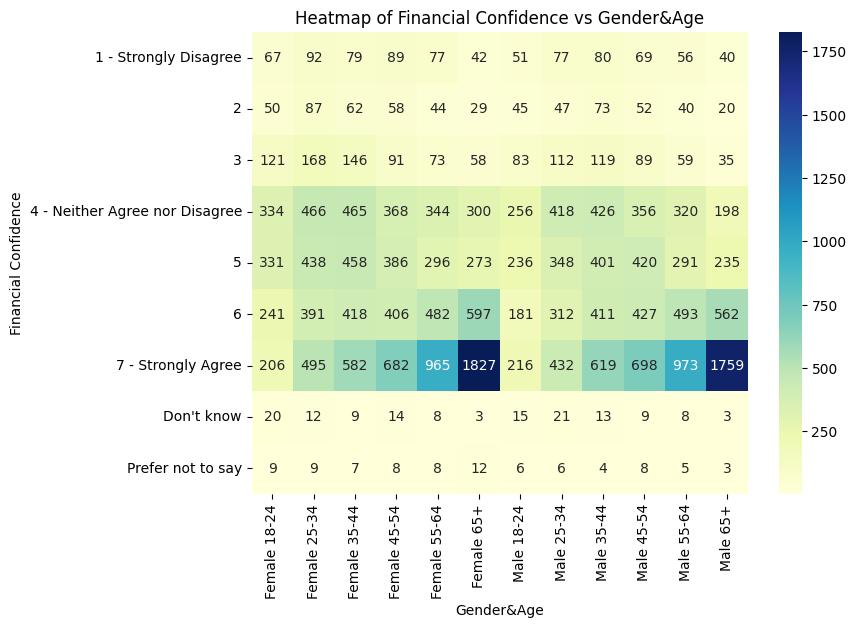

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categorical variables
cat1 = 'Financial Confidence'
cat2 = 'Gender&Age'

# Create a crosstab
ct = pd.crosstab(original_df[cat1], original_df[cat2])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Heatmap of {cat1} vs {cat2}')
plt.show()


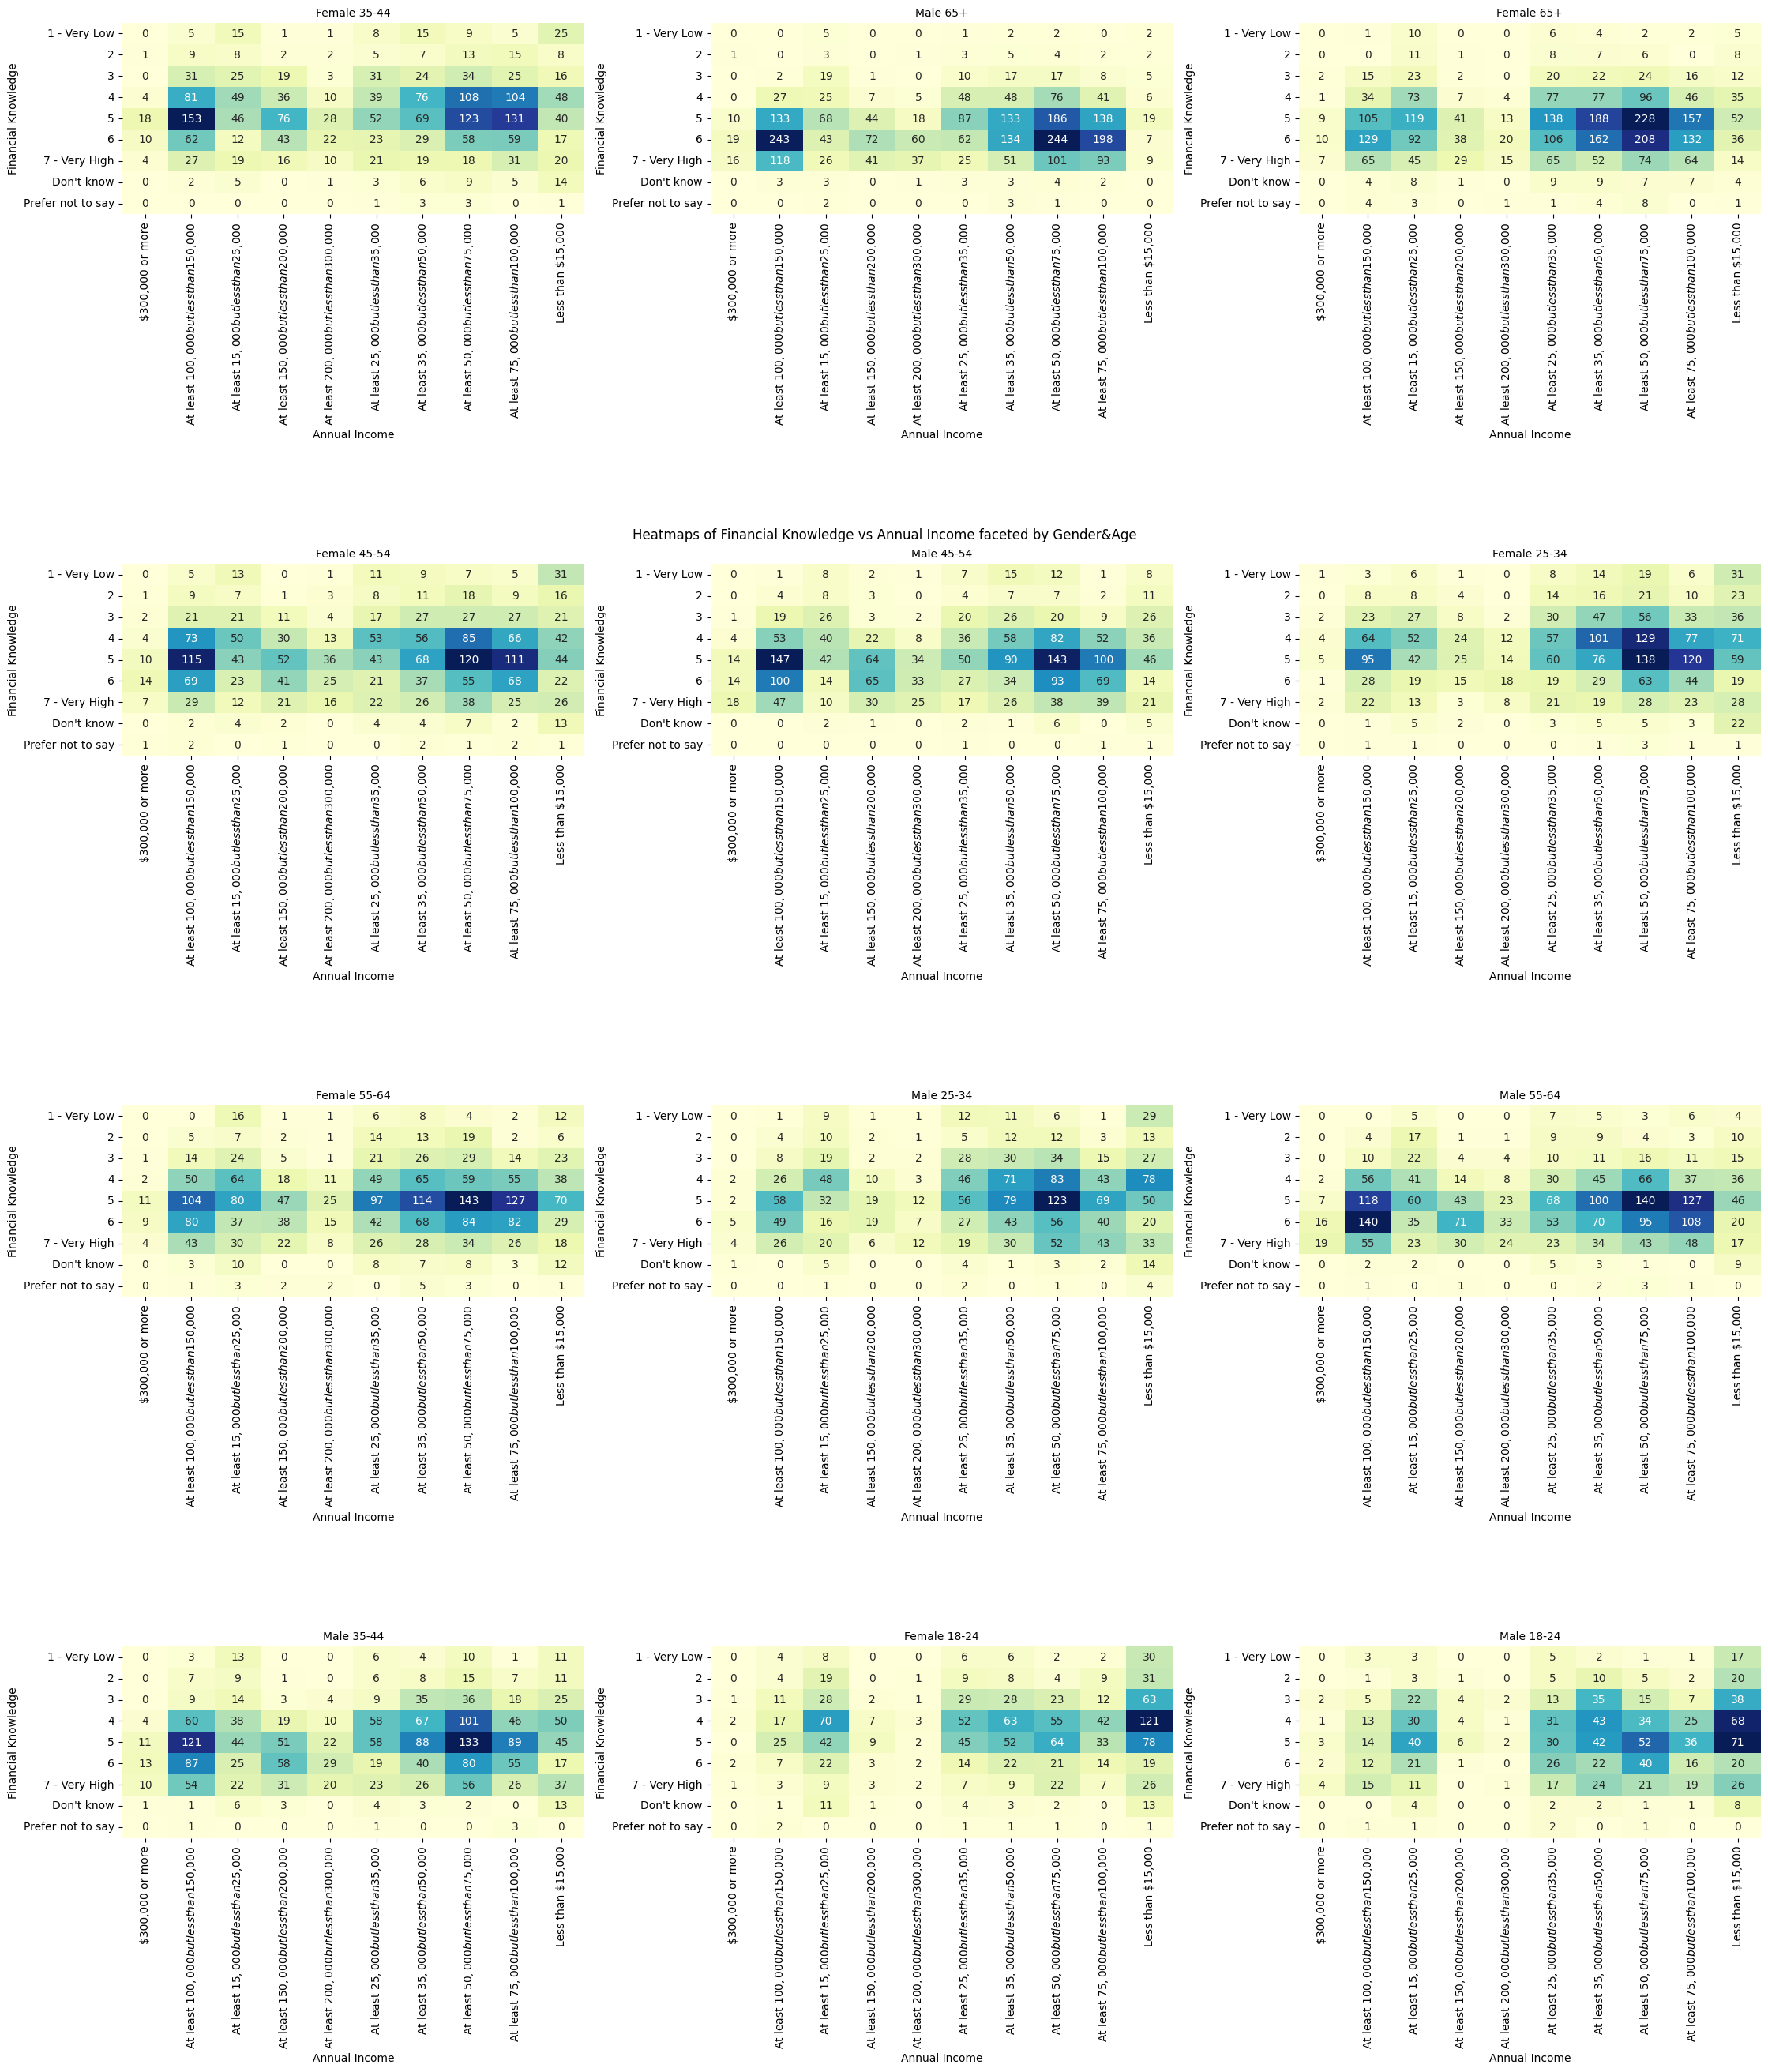

In [4]:
# ---------------------------
# FacetGrid heatmap for 3 categorical variables
# ---------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categorical columns
cat_x = 'Annual Income'    # x-axis of heatmap
cat_y = 'Financial Knowledge'             # y-axis of heatmap
facet_col = 'Gender&Age'         # third category as facet

# Create FacetGrid
g = sns.FacetGrid(original_df, col=facet_col, col_wrap=3, height=5,aspect=1.5, sharex=False, sharey=False)

# Define a plotting function for each facet
def heatmap_facet(data, **kwargs):
    ct = pd.crosstab(data[cat_y], data[cat_x])
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

# Map the function to the FacetGrid
g.map_dataframe(heatmap_facet)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=1.3)
g.fig.suptitle(f'Heatmaps of {cat_y} vs {cat_x} faceted by {facet_col}')
plt.show()


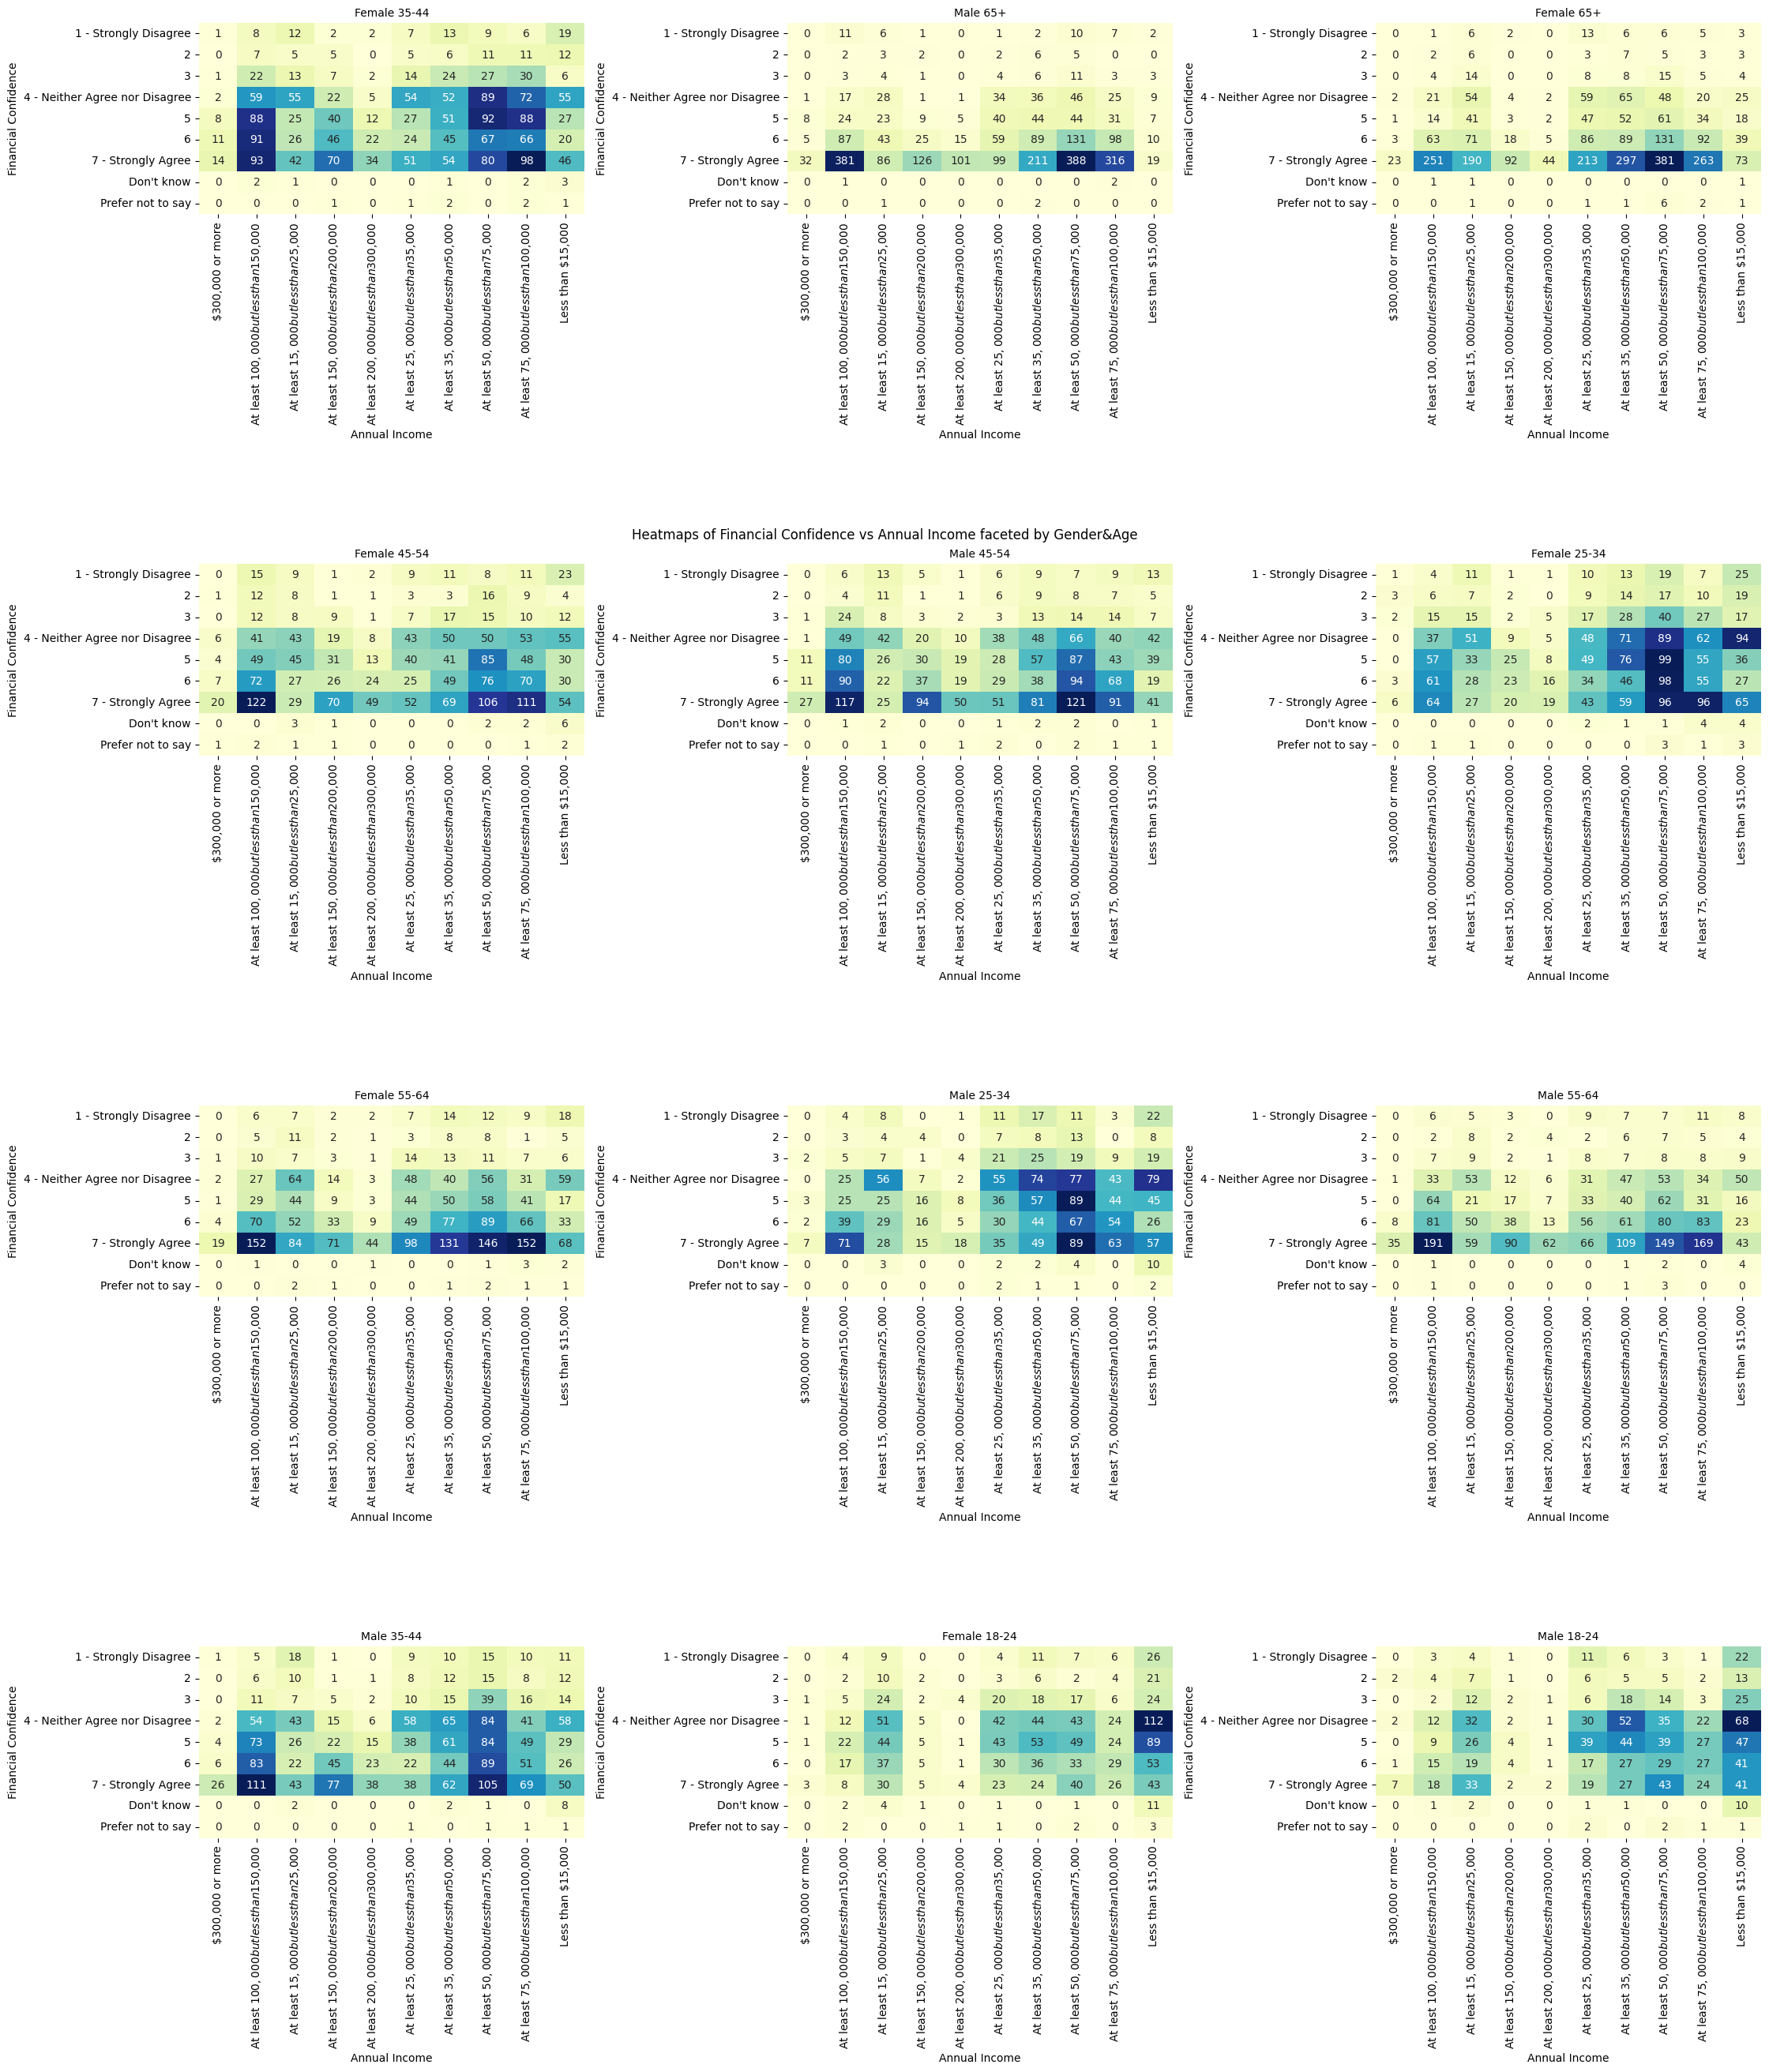

In [5]:
# ---------------------------
# FacetGrid heatmap for 3 categorical variables
# ---------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example categorical columns
cat_x = 'Annual Income'    # x-axis of heatmap
cat_y = 'Financial Confidence'             # y-axis of heatmap
facet_col = 'Gender&Age'         # third category as facet

# Create FacetGrid
g = sns.FacetGrid(original_df, col=facet_col, col_wrap=3, height=5,aspect=1.5, sharex=False, sharey=False)

# Define a plotting function for each facet
def heatmap_facet(data, **kwargs):
    ct = pd.crosstab(data[cat_y], data[cat_x])
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

# Map the function to the FacetGrid
g.map_dataframe(heatmap_facet)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=1.3)
g.fig.suptitle(f'Heatmaps of {cat_y} vs {cat_x} faceted by {facet_col}')
plt.show()
